In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from bitcoin import engine
df = engine.load_data('BTC-EUR')
df.head()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
0,1520272320,9322.00,9322.01,9322.01,9322.00,0.273876,0.104927,1063075.0,0.034975,0.170432
1,1520272380,9322.00,9322.01,9322.01,9322.00,0.145773,0.104928,1063083.0,0.034975,0.170432
2,1520272440,9320.00,9320.01,9320.00,9320.00,0.066710,0.104928,1063089.0,0.034975,0.170432
3,1520272500,9320.01,9320.01,9320.01,9320.01,0.013989,0.104928,1063091.0,0.034975,0.170432
4,1520272560,9320.01,9320.01,9320.01,9320.01,0.706339,0.104928,1063095.0,0.038833,0.170432


In [2]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
count,1.370000e+02,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02,137.000000,137.000000
mean,1.520276e+09,9369.349270,9369.949416,9369.588467,9369.701825,0.494734,0.092211,1.097506e+06,0.045866,0.169466
std,2.381554e+03,30.949375,30.767715,30.987533,30.836135,0.714113,0.006557,6.448628e+04,0.007069,0.002573
min,1.520272e+09,9320.000000,9320.010000,9320.000000,9320.000000,0.001000,0.082966,1.039913e+06,0.034975,0.140528
25%,1.520274e+09,9333.000000,9333.200000,9333.010000,9333.010000,0.100000,0.089702,1.048796e+06,0.038833,0.169182
50%,1.520276e+09,9379.990000,9380.000000,9380.000000,9380.000000,0.265944,0.092243,1.057231e+06,0.048710,0.169182
75%,1.520278e+09,9397.390000,9397.390000,9397.390000,9397.390000,0.632350,0.094030,1.173493e+06,0.048710,0.170432
max,1.520280e+09,9399.000000,9399.000000,9399.000000,9399.000000,4.345243,0.106180,1.193861e+06,0.058175,0.171182


In [3]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
time,1.000000,0.836913,0.839671,0.839444,0.838669,0.124758,-0.615757,0.198401,0.921964,-0.308739
low,0.836913,1.000000,0.997999,0.998744,0.999272,0.189677,-0.680177,-0.166655,0.815168,-0.262210
high,0.839671,0.997999,1.000000,0.999191,0.999286,0.197180,-0.683805,-0.168354,0.814811,-0.260915
open,0.839444,0.998744,0.999191,1.000000,0.998707,0.187751,-0.684472,-0.166884,0.817302,-0.261894
close,0.838669,0.999272,0.999286,0.998707,1.000000,0.199085,-0.681910,-0.167714,0.813927,-0.261334
volume,0.124758,0.189677,0.197180,0.187751,0.199085,1.000000,-0.254439,-0.209968,0.041781,0.022074
tw_sentiment,-0.615757,-0.680177,-0.683805,-0.684472,-0.681910,-0.254439,1.000000,0.186843,-0.439353,0.153912
tw_followers,0.198401,-0.166655,-0.168354,-0.166884,-0.167714,-0.209968,0.186843,1.000000,0.201448,-0.040273
reddit_sentiment,0.921964,0.815168,0.814811,0.817302,0.813927,0.041781,-0.439353,0.201448,1.000000,-0.283435
google_sentiment,-0.308739,-0.262210,-0.260915,-0.261894,-0.261334,0.022074,0.153912,-0.040273,-0.283435,1.000000


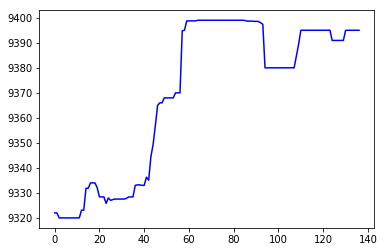

In [4]:
plt.plot(df['close'], 'b')

In [5]:
model, history, X_train, X_test, scalerX, scalerY = engine.train(df)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            164800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 485,801
Trainable params: 485,801
Non-trainable params: 0
_________________________________________________________________


([<matplotlib.lines.Line2D at 0x11ce588d0>], 'g')

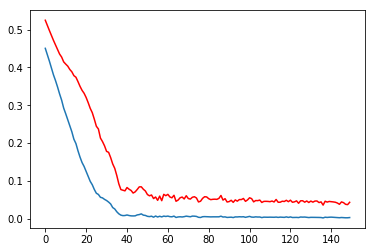

In [6]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error']), 'g'

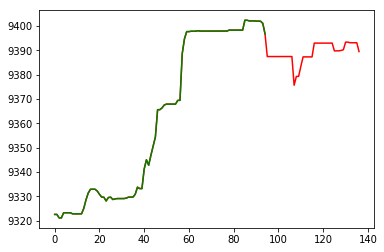

In [8]:
import numpy as np
y_predict_train = model.predict(X_train)
y_predict_train = scalerY.inverse_transform(y_predict_train)

y_predict_test = model.predict(X_test)
y_predict_test = scalerY.inverse_transform(y_predict_test)

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_predict_train, y_predict_test), axis=0)

plt.plot(y, 'r')
plt.plot(y_predict_train, 'g')

In [9]:
engine.test_order_percent(df, model, scalerX, scalerY)

Error Order percentage: 17.52%
